<a href="https://www.kaggle.com/code/sahilr05/stock-100-day-predict-prophet?scriptVersionId=106506372" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-exchange-data/indexProcessed.csv
/kaggle/input/stock-exchange-data/indexData.csv
/kaggle/input/stock-exchange-data/indexInfo.csv


In [2]:
indexData = pd.read_csv("/kaggle/input/stock-exchange-data/indexData.csv")
indexData.head(3)

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0


In [3]:
indexInfo=pd.read_csv("/kaggle/input/stock-exchange-data/indexInfo.csv")
indexInfo.head(3)

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD


In [4]:
indexProcessed = pd.read_csv("/kaggle/input/stock-exchange-data/indexProcessed.csv")
indexProcessed.head(3)

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987


In [5]:
indexData.shape, indexInfo.shape, indexProcessed.shape

((112457, 8), (14, 4), (104224, 9))

In [6]:
hsidata = indexData[indexData["Index"]=="HSI"].dropna()

In [7]:
hsidata.reset_index(inplace=True)
hsidata.head(3)

,index,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,26638,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0
1,26640,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0
2,26641,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0


In [8]:
hsidata["Date"] = pd.to_datetime(hsidata["Date"])
hsidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8492 entries, 0 to 8491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      8492 non-null   int64         
 1   Index      8492 non-null   object        
 2   Date       8492 non-null   datetime64[ns]
 3   Open       8492 non-null   float64       
 4   High       8492 non-null   float64       
 5   Low        8492 non-null   float64       
 6   Close      8492 non-null   float64       
 7   Adj Close  8492 non-null   float64       
 8   Volume     8492 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 597.2+ KB


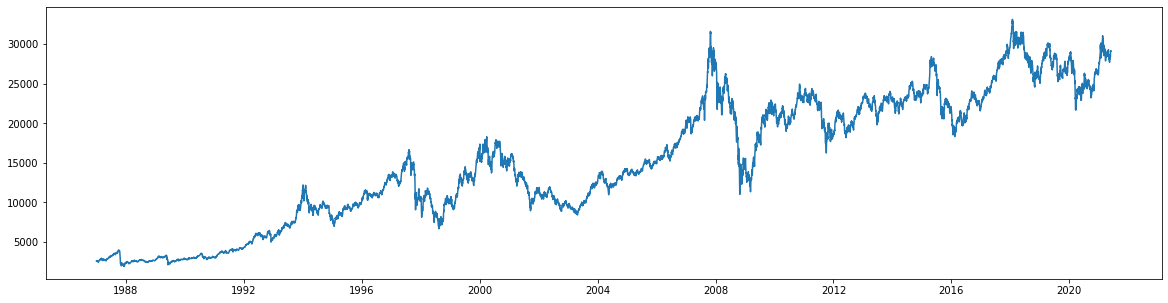

In [9]:
plt.figure(figsize=(20,5))
plt.plot(hsidata["Date"],hsidata["Adj Close"])

In [10]:
# Facebook open source library - Prophet

!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet
pd = hsidata[["Date","Adj Close"]]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 377.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9434389 sha256=76fe6db79b27af851c356a5cc8fcc269783dc36d64e3e205a634a878067e2677
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [11]:
pd.columns = ["ds","y"]
pd.tail()

,ds,y
8487,2021-05-25,28910.85938
8488,2021-05-26,29166.00977
8489,2021-05-27,29113.19922
8490,2021-05-28,29124.41016
8491,2021-05-31,29151.80078


In [12]:
# Fit Model

m = Prophet(interval_width=0.95)
model = m.fit(pd)

Initial log joint probability = -30.85
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       18486.2      0.012777       2562.97      0.8641      0.8641      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199         18876    0.00209002       435.429           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       19010.2     0.0043113       949.003           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       19079.9     0.0078448       476.452           1           1      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       19421.8     0.0527428       531.733      0.8878      0.8878      554   
    Iter      log prob        ||dx||      ||grad||       alpha    

In [13]:
# Predict for next 100 day's

future = m.make_future_dataframe(100)
forecast = m.predict(future)
forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1986-12-31,2626.542702,-179.418590,5941.453464,2626.542702,2626.542702,113.200011,113.200011,113.200011,32.602379,32.602379,32.602379,80.597632,80.597632,80.597632,0.0,0.0,0.0,2739.742713
1,1987-01-02,2626.871161,-541.606258,5697.476945,2626.871161,2626.871161,127.196714,127.196714,127.196714,29.305221,29.305221,29.305221,97.891493,97.891493,97.891493,0.0,0.0,0.0,2754.067875
2,1987-01-05,2627.363849,-383.252505,5883.966617,2627.363849,2627.363849,140.725864,140.725864,140.725864,18.379246,18.379246,18.379246,122.346618,122.346618,122.346618,0.0,0.0,0.0,2768.089713


In [14]:
forecast[["ds","yhat"]]

,ds,yhat
0,1986-12-31,2739.742713
1,1987-01-02,2754.067875
2,1987-01-05,2768.089713
3,1987-01-06,2788.627663
4,1987-01-07,2797.108698
...,...,...
8587,2021-09-04,28197.002600
8588,2021-09-05,28198.595727
8589,2021-09-06,28290.467809
8590,2021-09-07,28303.158520


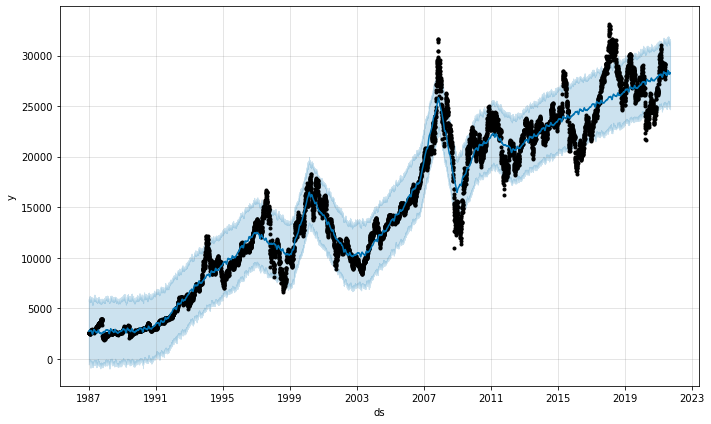

In [15]:
plot1 = m.plot(forecast)

- black is orignal data points
- blue is predicted line

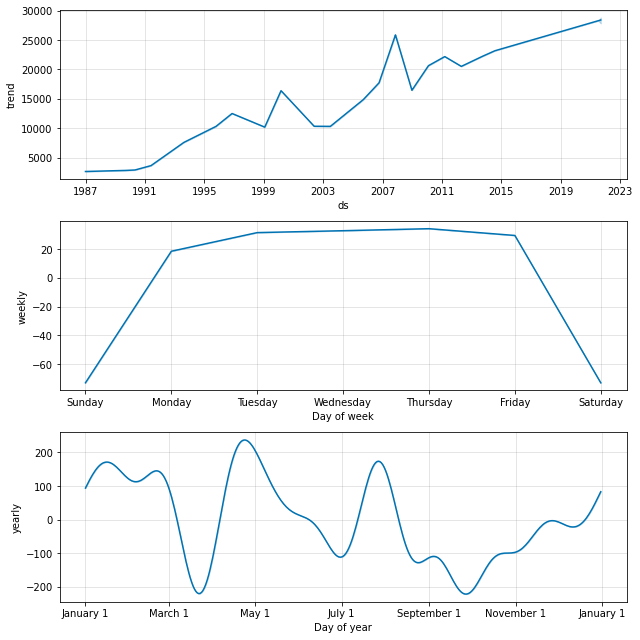

In [16]:
plot2 = m.plot_components(forecast)

- base on chat clearly see stock price increase in January & it's down on march-april

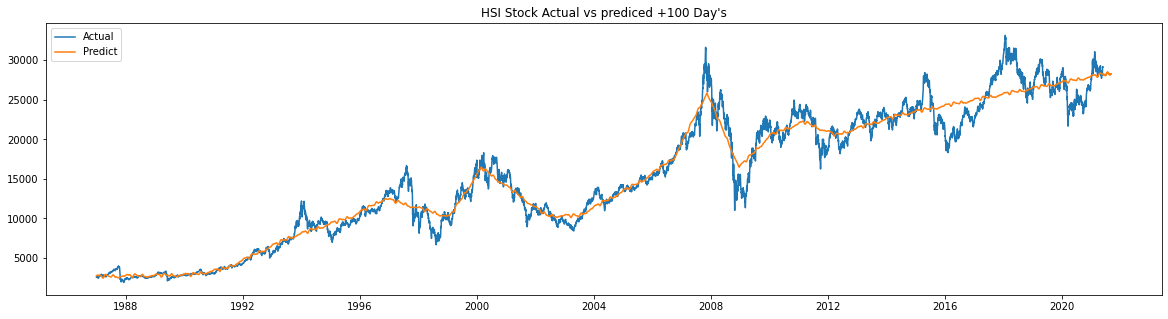

In [17]:
plt.figure(figsize=(20,5))
plt.title("HSI Stock Actual vs prediced +100 Day's")
plt.plot(pd["ds"],pd["y"],label="Actual")
plt.plot(forecast["ds"],forecast["yhat"],label="Predict")
plt.legend()